In [3]:
import sympy
#from sympy import *
#init_printing(use_unicode=False, wrap_line=False)
x = sympy.Symbol('x')
sympy.integrate(x**2 + x + 1, x)

x**3/3 + x**2/2 + x

In [12]:
f,x,fmin=sympy.symbols('f,x,fmin',positive=True)
sympy.integrate(f/(f+x*(1-f)),f)

-f/(x - 1) - x*log(f*(x - 1) - x)/(x - 1)**2

In [23]:
p1=sympy.integrate(f/(f+x*(1-f))/f,(f,fmin,1))
p1

log(fmin*(x - 1) - x)/(x - 1) - I*pi/(x - 1)

In [22]:
import numpy as np
p1.subs(x,.1)

-1.11111111111111*log(-0.9*fmin - 0.1) + 1.11111111111111*I*pi

In [103]:
P0(10**-3.5,10**-7),2/7

(0.5001385475744644, 0.2857142857142857)

In [109]:
P1(.1)

0.963114272156024

<timed exec>:6: RuntimeWarning: invalid value encountered in divide
<timed exec>:3: RuntimeWarning: invalid value encountered in divide


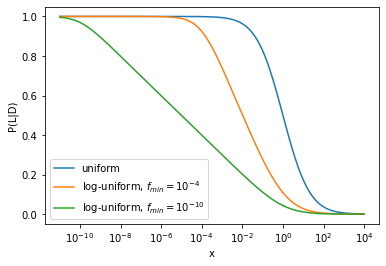

CPU times: user 648 ms, sys: 65.6 ms, total: 714 ms
Wall time: 758 ms


In [110]:
%%time
from matplotlib import pyplot as plt
def P0(x,fmin):
    return np.log(x+fmin*(1-x))/(1-x)/np.log(fmin)#*np.heaviside(x-fmin,1)

def P1(x):
    return (1-x+x*np.log(x))/(1-x)**2

step=10**-5
smax=10000
#xs = np.arange(0.00,smax,step)
xs = smax*10.0**-np.arange(0,15,.01)
plt.plot(xs,P1(xs),label='uniform')
plt.plot(xs,P0(xs,10**-4),label='log-uniform, $f_{min}=10^{-4}$')
plt.plot(xs,P0(xs,10**-10),label='log-uniform, $f_{min}=10^{-10}$')
plt.xscale('log')
plt.legend()
#plt.xlim(0,smax)
plt.xlabel('x')
plt.ylabel('P(L|D)')
plt.show()
#plt.savefig('u_vs_lu.pdf',bbox_inches='tight')

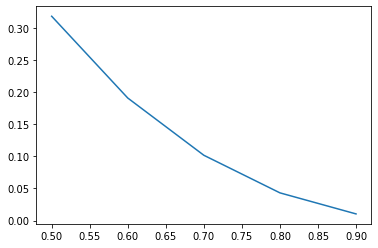

In [193]:
def ss(x):
    return np.log(1/x)+1/2*x**2-1/2
xs=np.arange(.5,1,.1)
plt.plot(xs,ss(xs))

In [128]:
x,sigma1,sigma2=sympy.symbols('x,sigma1,sigma2',positive=True)
n1=sympy.exp(-x**2/sigma1**2/2)/\
sympy.sqrt(2*sympy.pi*sigma1**2)
n2=sympy.exp(-x**2/sigma2**2/2)/\
sympy.sqrt(2*sympy.pi*sigma2**2)
sympy.logcombine(sympy.integrate(n1*sympy.log(n1/n2),
                (x,-sympy.oo,sympy.oo)))

sigma1**2/(2*sigma2**2) + log(sigma2/sigma1) - 1/2

In [190]:
f,n=sympy.symbols('f,n',positive=True)
sympy.integrate(n*(1-f)**(n-1)*sympy.log(n*(1-f)**(n-1)),(f,0,1))
#np.log(2)-1/2

n*Integral((1 - f)**(n - 1)*(log(n) + log((1 - f)**n/(1 - f))), (f, 0, 1))

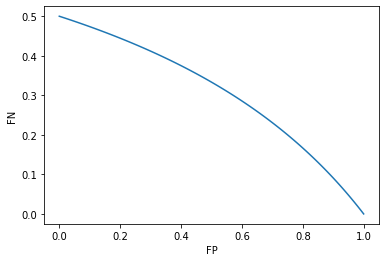

In [131]:
fps=np.arange(0,1.01,.01)
plt.plot(fps,(1-fps)/(2-fps))
plt.xlabel('FP')
plt.ylabel('FN')
plt.show()

<Figure size 1440x1440 with 0 Axes>

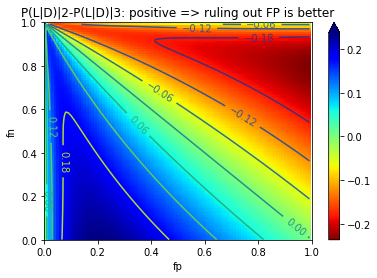

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import norm


def P1(x):
    return (1-x+x*np.log(x))/(1-x)**2

def Pdiff(fp,fn):
    return P1(fp**2/(1-2*fn+fn**2))-P1((2*fp-fp**2)/(1-fn**2))
    #return P1((1-(1-fp)**2)/(1-fn))-P1(fp/(1-fn)**2)

fps=np.arange(.001,1,.01)
fns=np.arange(.001,1,.01)


X,Y = np.meshgrid(fps,fns)
Z = Pdiff(X,Y)


plt.figure(figsize=(20,20))
fig, ax = plt.subplots()

ax.set_xlabel('fp')
ax.set_ylabel('fn')
ax.set_title('P(L|D)|2-P(L|D)|3: positive => ruling out FP is better')


pcm = ax.pcolormesh(X, Y, Z,
                   #norm = LogNorm(vmin=abs(Z).min(),vmax=abs(Z).max()),
                   cmap='jet_r', shading='nearest'
                   )
fig.colorbar(pcm, ax=ax, extend='max')
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True,fontsize=10)

#xs = np.arange(.1,10,.01)
#plt.plot(xs,np.arctan(1/xs),c='black')
#plt.plot([1,1],[0,1],c='white',linewidth=3,linestyle='--')
#plt.plot(fps,(1-fps)/(2-fps)+.01)
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()

In [165]:
p1,p2,q1,q2=sympy.symbols('p1,p2,q1,q2',integer=True)
sympy.simplify(sympy.integrate(f**p1*(1-f)**p2*sympy.log(f),(f,0,1)))

(-1)**p2*Integral(f**p1*(f - 1)**p2*log(f), (f, 0, 1))

In [178]:
sympy.solve(p1/(2-p1)*(1+p2)/(1-p2)-1,p2)

[1 - p1]

/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/1444171709.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(xs,xs*np.log(xs))
/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/1444171709.py:2: RuntimeWarning: invalid value encountered in multiply
  plt.plot(xs,xs*np.log(xs))


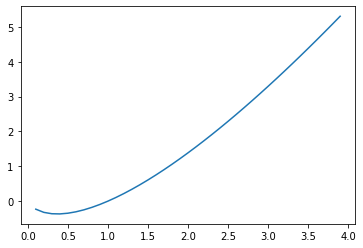

In [195]:
xs=np.arange(0,4,.1)
plt.plot(xs,xs*np.log(xs))